In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# loading the dataset
df = pd.read_csv('youtube songs data.csv')

In [9]:
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


**1. Data Cleaning and Preparation**

In [12]:
# Handling missing values
df.fillna({'likeCount': 0, 'commentCount': 0, 'favoriteCount': 0, 'tags': ''}, inplace=True)

In [14]:


# Converting publishedAt to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [15]:


# Extracting relevant datetime features
df['publishedYear'] = df['publishedAt'].dt.year
df['publishedMonth'] = df['publishedAt'].dt.month
df['publishedDay'] = df['publishedAt'].dt.day
df['publishedHour'] = df['publishedAt'].dt.hour

In [20]:


# Convert duration from ISO 8601 format to seconds
import isodate

df['duration'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

**2. Exploratory Data Analysis (EDA)**

In [22]:


# Basic Statistics
print(df.describe())

         Unnamed: 0     viewCount     likeCount  favoriteCount   commentCount  \
count  19345.000000  1.934500e+04  1.934500e+04        19345.0   19345.000000   
mean    9672.000000  1.193826e+07  8.718149e+04            0.0    2636.024141   
std     5584.564814  5.484973e+07  3.610099e+05            0.0   12487.178242   
min        0.000000  0.000000e+00  0.000000e+00            0.0       0.000000   
25%     4836.000000  8.044200e+04  6.440000e+02            0.0      37.000000   
50%     9672.000000  3.627810e+05  3.929000e+03            0.0     184.000000   
75%    14508.000000  2.613386e+06  2.580300e+04            0.0     961.000000   
max    19344.000000  1.536719e+09  1.284022e+07            0.0  420375.000000   

           duration  publishedYear  publishedMonth  publishedDay  \
count  19345.000000   19345.000000    19345.000000  19345.000000   
mean     296.894236    2016.497648        6.142311     16.717033   
std      589.703604       4.101837        3.119925      8.624343  

C:\Users\Rahul Raj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


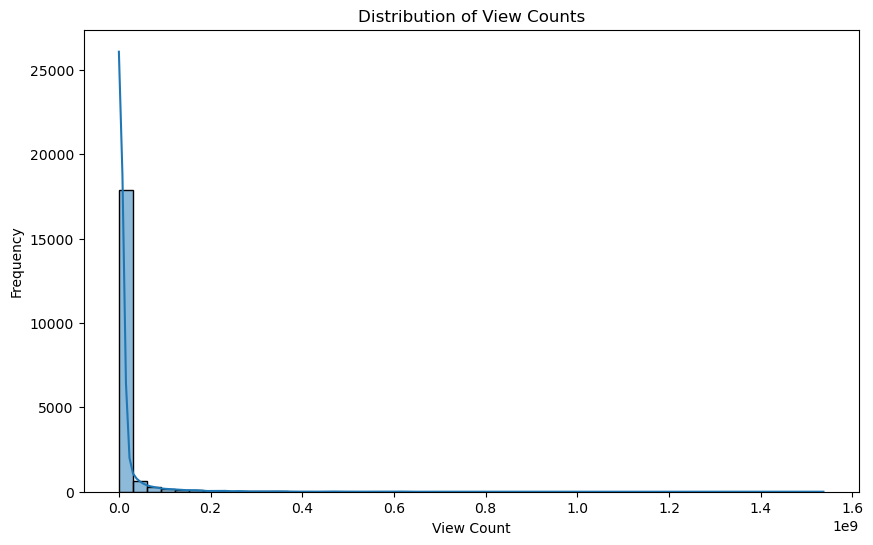

In [23]:


# Distribution of view counts
plt.figure(figsize=(10, 6))
sns.histplot(df['viewCount'], bins=50, kde=True)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\Rahul Raj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


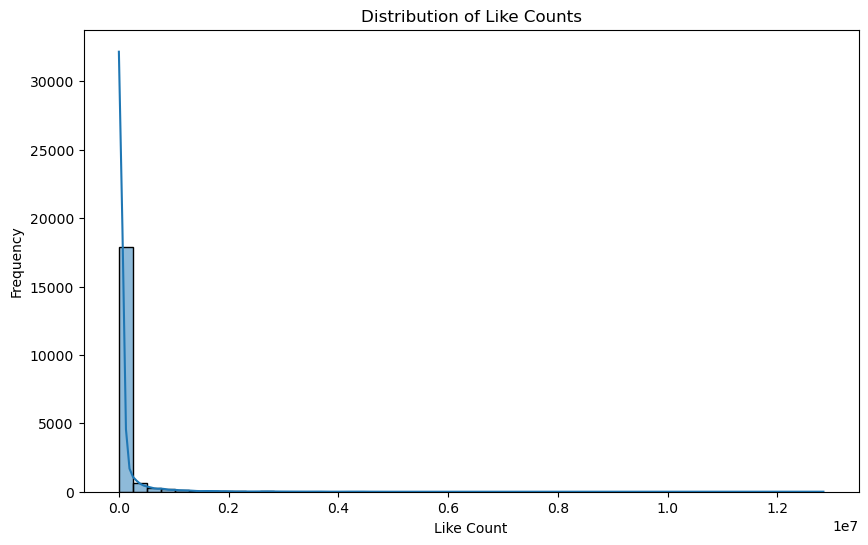

In [24]:


# Distribution of like counts
plt.figure(figsize=(10, 6))
sns.histplot(df['likeCount'], bins=50, kde=True)
plt.title('Distribution of Like Counts')
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.show()

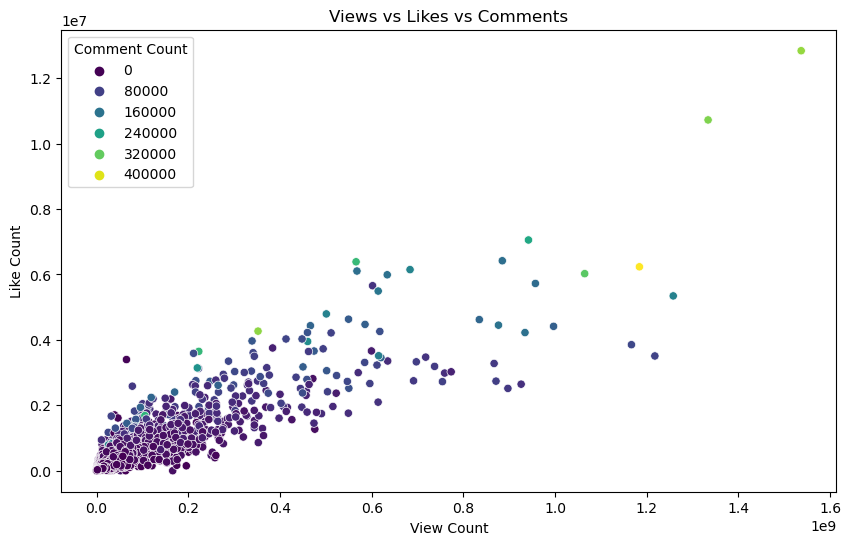

In [25]:


# Relationship between views, likes, and comments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='viewCount', y='likeCount', hue='commentCount', palette='viridis')
plt.title('Views vs Likes vs Comments')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.legend(title='Comment Count')
plt.show()

**3. Content and Channel Analysis**

C:\Users\Rahul Raj\anaconda3\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


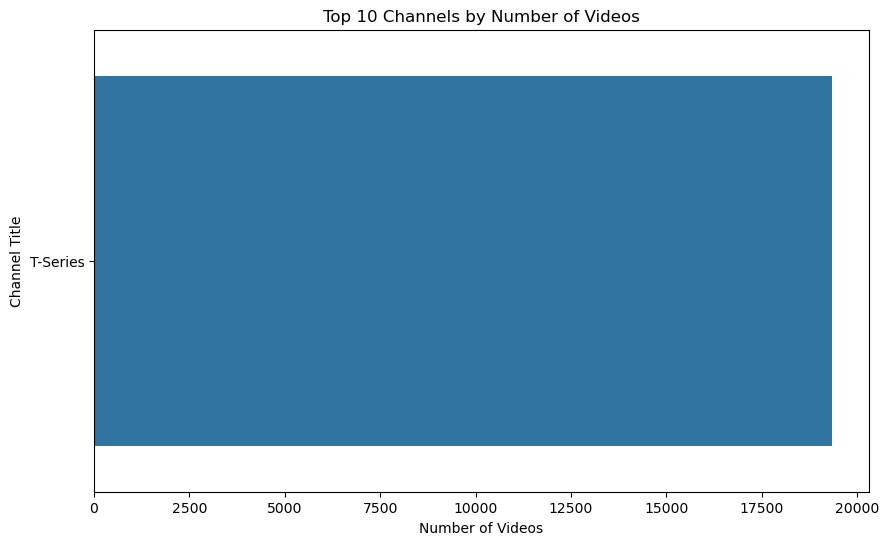

In [26]:
# Top channels by number of videos
top_channels = df['channelTitle'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels.values, y=top_channels.index)
plt.title('Top 10 Channels by Number of Videos')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Title')
plt.show()

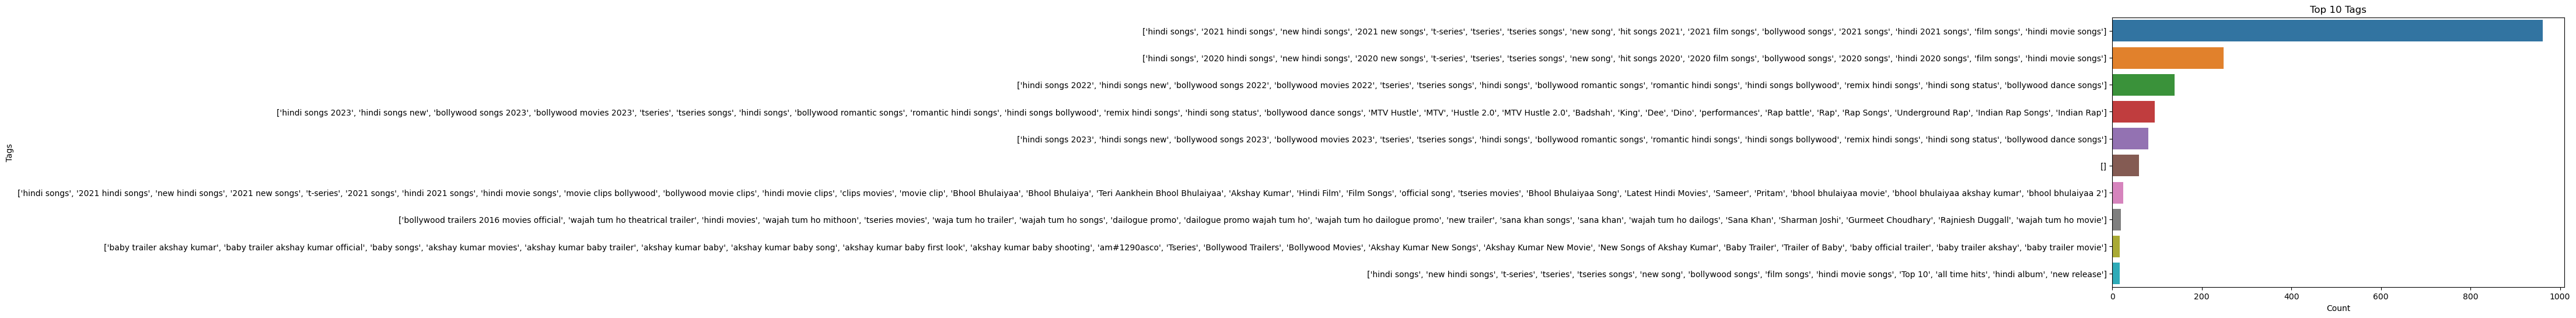

In [27]:


# Popular tags
tags = df['tags'].str.split('|').explode()
top_tags = tags.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Top 10 Tags')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.show()

**4. Temporal Trends**

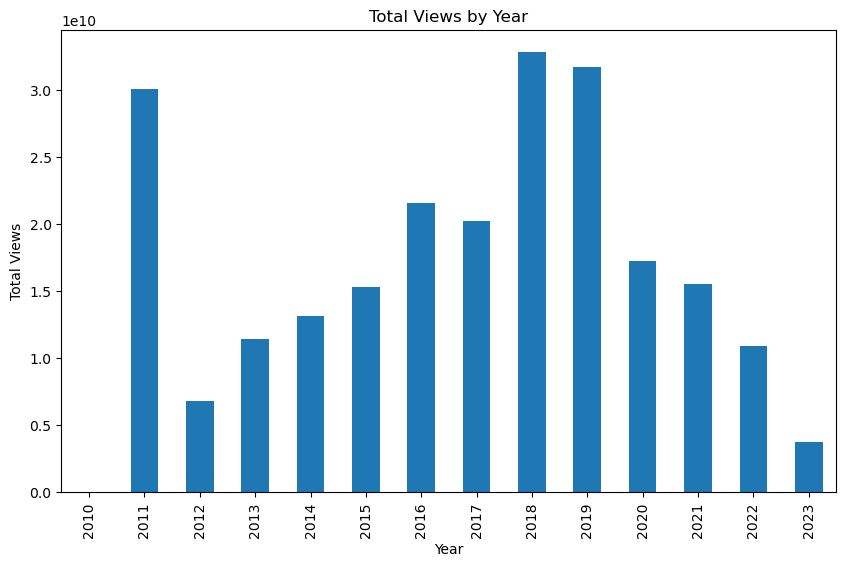

In [28]:
# Views over time
df.groupby('publishedYear')['viewCount'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Total Views by Year')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.show()

**5. User Engagement Insights**

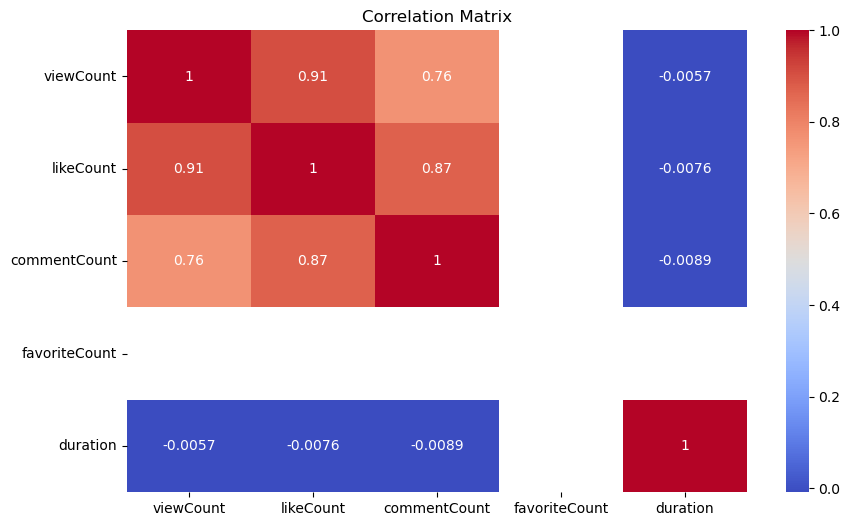

In [29]:
# Correlation matrix
corr = df[['viewCount', 'likeCount', 'commentCount', 'favoriteCount', 'duration']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:



# Save cleaned data for Power BI
df.to_csv('filtered_youtube_songs_data.csv', index=False)